<a href="https://colab.research.google.com/github/ashikshafi08/DUDL-Pytorch/blob/main/Overfitting_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 

import torch 
import torch.nn as nn 


## Cross Validation - Manual separation 

- How to implement cv manually using Numpy.
- How to perform CV on iris dataset. 

In [2]:
# Downloading the iris dataset 
import seaborn as sns 
iris = sns.load_dataset('iris')

# COnvert from pandas df to tensor
data = torch.tensor( iris[iris.columns[0:4]].values).float()

# Transform species to number 
labels = torch.zeros(len(data) , dtype = torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2 

data.shape , labels.shape

(torch.Size([150, 4]), torch.Size([150]))

Here we will seperate the data into train and test set we won't be using the validation set here. 

In [3]:
# Splitting the data

# How many training examples? 
trainProp = .8 # not percentage, in proportion
nTraining = int(len(labels) *trainProp)

# Initialize a boolean vector to select data and labels 
trainTestBool = np.zeros(len(labels) , dtype = bool)

# Setting the first N samples to be True (so we can consider as training)
trainTestBool[range(nTraining)] = True 

trainTestBool

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False,

If its True then it means the data is exposed to the training set and with False it belongs tot he test set. 

The main concern while splitting the dataset is label imabalance and this occurs if the labels in the dataset isn't balanced well and it hugely affects our model's performance and introduce bias. 

In [4]:
# Testing whether the splitted data is balanced or not 
print('Average of full data: ')
print(torch.mean(labels.float())) # =1 by definition 
print('\n')

print('Average on the training data: ')
print(torch.mean(labels[trainTestBool].float())) # should be 1


print('Average on the testing data: ') # should be 1
print(torch.mean(labels[~trainTestBool].float())) # should be 1

Average of full data: 
tensor(1.)


Average on the training data: 
tensor(0.7500)
Average on the testing data: 
tensor(2.)


In [5]:
# Shedding some randomness! 

trainTestBool = np.zeros(len(labels) , dtype = bool)


items2use4train = np.random.choice(range(len(labels)) , nTraining , replace = False)
items2use4train

array([ 47,  61, 129,  43,  66,  65,  96,  34,  46,  69,  57, 107,  36,
        78,  75,  80, 145, 115,  22,  84,  67,  56, 105,  25,  91,  49,
        72,  16, 111,  24,  30,  21,  32,  83,  74,  19,  14, 128,  17,
        23, 148, 118,  97, 103, 113, 149, 139, 123,  99,  90,  40,   6,
       120,  35,   9,  71,  59,  18,  38,  60,  52,  53,  64,  85, 130,
       108, 132, 133,  86, 131,  41,  39,  92,  51, 144,  54,  81, 110,
       106, 143, 136,   4,  76, 124, 119,  26,   1,  93,  87,  77,  15,
       122, 138,   8, 101,  95,  82, 117,  12,  13, 114, 104,  88,   3,
       102,  31,  89, 116,  98, 146,  10,   2,  70, 140,  20,  48, 121,
        33, 112,  42])

In [6]:
# Now for the above indexes we set the values to be True , that is training set 
trainTestBool[items2use4train] = True 
trainTestBool

array([False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,

In [7]:
  # Testing whether the splitted data is balanced or not 
print('Average of full data: ')
print(torch.mean(labels.float())) # =1 by definition 
print('\n')

print('Average on the training data: ')
print(torch.mean(labels[trainTestBool].float())) # should be 1


print('Average on the testing data: ') # should be 1
print(torch.mean(labels[~trainTestBool].float())) # should be 1

Average of full data: 
tensor(1.)


Average on the training data: 
tensor(0.9917)
Average on the testing data: 
tensor(1.0333)


The larger the dataset the less we need to worry about the balance in labels. 

In [8]:
 # Create the ANN model 

ANNiris = nn.Sequential(
     nn.Linear(4 , 64) , 
     nn.ReLU(), 
     nn.Linear(64 , 64), 
     nn.ReLU(),
     nn.Linear(64, 3)
 )

loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(ANNiris.parameters() , lr = .01)


In [9]:
# Checking the shape of our dataset 

print(data.shape) # entire dataset 
print(data[trainTestBool, :].shape)
print(data[~trainTestBool, :].shape)

torch.Size([150, 4])
torch.Size([120, 4])
torch.Size([30, 4])


In [10]:
# Train and test the model 
numepochs = 1000 

# Intialize the losses to store 
losses = torch.zeros(numepochs)
onGoingAcc = []

# Loop over the epochs 
for epoch in range(numepochs):

  # Forward pass 
  yHat = ANNiris(data[trainTestBool, :])

  # Compute accuracy 
  acc = 100*torch.mean((torch.argmax(yHat , axis = 1) == labels[trainTestBool]).float())
  onGoingAcc.append(acc)

  # Compute the loss 
  loss = loss_func(yHat , labels[trainTestBool])
  losses[epoch] = loss 

  # Backward pass 
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



In [11]:
# Evaluating the test and train accuracies 

# Final forward pass to make predictions after making the prediction 
predictions = ANNiris(data[trainTestBool , :])
trainAcc = 100*torch.mean((torch.argmax(predictions , axis = 1 ) == labels[trainTestBool]).float())

# Final forward pass the trained model
predictions = ANNiris(data[~trainTestBool , :])
testAcc = 100*torch.mean((torch.argmax(predictions , axis = 1 ) == labels[~trainTestBool]).float())

trainAcc , testAcc

(tensor(98.3333), tensor(96.6667))

## Cross Validation - Scikit-learn
- Implement cv using the sklearn 
- Perform a parametric experiment with the fraction of train/test items.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Creating fake data to test the utility 
fakeData =  np.tile(np.array([1,2,3,4]) , (10 ,1)) + np.tile(10*np.arange(1 ,11) , (4,1) ).T
fakeLabels = np.arange(10) > 4 

print(fakeData) , print('')
print(fakeLabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]

[False False False False False  True  True  True  True  True]


In [14]:
# Using the funtionality to split the data 
trainData , testData , trainLabels , testLabels = train_test_split(fakeData , fakeLabels , test_size = .2 ,
                                                                   shuffle = False)

print(f'Train data shape: {trainData.shape}')
print(f'Test data shape: {testData.shape}')
print(f'Train labels shape: {trainLabels.shape}')
print(f'Test labels shape: {testLabels.shape}')

Train data shape: (8, 4)
Test data shape: (2, 4)
Train labels shape: (8,)
Test labels shape: (2,)


In [15]:
print(trainData)
print('\n')
print(testData)

[[11 12 13 14]
 [21 22 23 24]
 [31 32 33 34]
 [41 42 43 44]
 [51 52 53 54]
 [61 62 63 64]
 [71 72 73 74]
 [81 82 83 84]]


[[ 91  92  93  94]
 [101 102 103 104]]


In [16]:
def createTheModel():

   # Create the ANN model 

  ANN = nn.Sequential(
     nn.Linear(4 , 64) , 
     nn.ReLU(), 
     nn.Linear(64 , 64), 
     nn.ReLU(),
     nn.Linear(64, 3)
  )

  lossfun = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(ANN.parameters() , lr = .01)

  return ANN , lossfun , optimizer


numepochs = 200 

def trainTheModel(trainProp):

  # Initialize the values to store the results 
  losses = torch.zeros(numepochs)
  trainAcc = []
  testAcc = []

  # Making the splits 
  # Inside the training loop will leads to mixing up of train and test data that leads to overfitting!
  X_train , X_test , y_train, y_test = train_test_split(data , labels , 
                                                          train_size = trainProp)

  # Loop over the epohcs 
  for epoch in range(numepochs):

    # Separate the train from test data 
    # Note 1: Unique split for each epoch 
    # Note 2: here we specify the amount of training size, not testing size 
    # X_train , X_test , y_train, y_test = train_test_split(data , labels ,  train_size = trainProp)
    
    # Forward pass 
    yHat = ANN(X_train)
    
    # Compute loss 
    loss = lossfun(yHat , y_train)

    # backward pass 
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Compute the training accuracy 
    trainAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y_train).float()).item() )


    # Test accuracy 
    predLabels = torch.argmax(ANN(X_test) , axis = 1)
    testAcc.append( 100*torch.mean((predLabels == y_test).float()).item() )

  # Function output 
  return trainAcc, testAcc

In the above function we are making predictions on the test set inside a training loop, does it affect the results or hinder the performance? 

No, since we are computing the gradients and doing the backprop we only care about the training size of the model. 


In [17]:
# Testing the model by running it once 
ANN , lossfun, optimizer = createTheModel()

# Train the model 
# Training proportion 
trainAcc , testAcc = trainTheModel(.8)


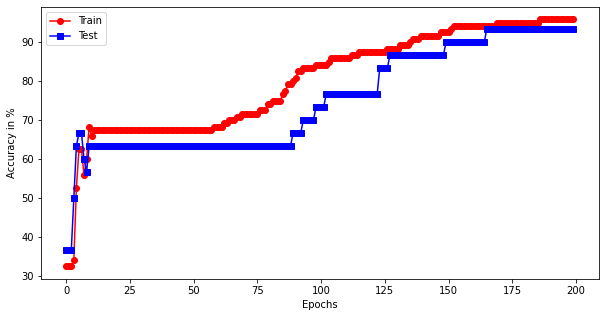

In [18]:
# Plot the results 
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (10 , 5))

plt.plot(trainAcc , 'ro-')
plt.plot(testAcc , 'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy in %')
plt.legend(['Train' , 'Test'])
plt.show()




**Running the experiments** with different train set sizes. 



In [19]:
trainSetSizes = np.linspace(.2, .95 , 10)

# Storing all the accuracies 
allTrainAcc = np.zeros((len(trainSetSizes) , numepochs))
allTestAcc = np.zeros((len(trainSetSizes) , numepochs))

for i in range(len(trainSetSizes)):

  # Create a model 
  ANN , lossfun , optimizer = createTheModel()

  # Train the model
  trainAcc , testAcc = trainTheModel(trainSetSizes[i])

  # Store the results 
  allTrainAcc[i, :] = trainAcc
  allTestAcc[i , :] = testAcc



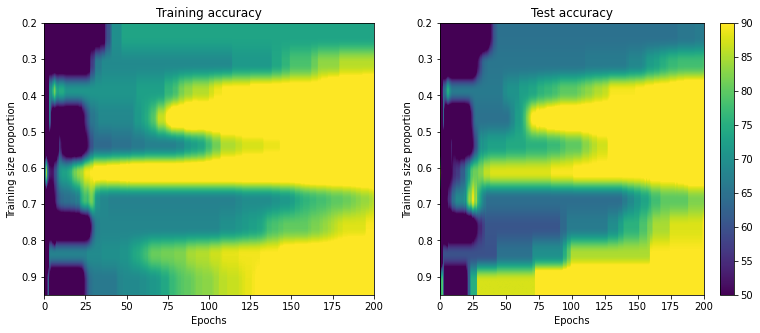

In [20]:
fig,ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(allTrainAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Training size proportion')
ax[0].set_title('Training accuracy')

p = ax[1].imshow(allTestAcc,aspect='auto',
             vmin=50,vmax=90, extent=[0,numepochs,trainSetSizes[-1],trainSetSizes[0]])
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training size proportion')
ax[1].set_title('Test accuracy')
fig.colorbar(p,ax=ax[1])

plt.show()

In here the dataset is too small to draw any firm conclusions about the relationship between the training proportion and overall accuracy. 